In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [3]:
base = VGG16(
    weights = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    include_top = False,
    input_shape=(224,224,3)
)

In [4]:
for layer in base.layers:
    layer.trainable = False

In [7]:
selected_classes = ['airplanes', 'ant']
img_generator = ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255,
    validation_split=0.3
)
train_data = img_generator.flow_from_directory(
    directory="caltech-101-img", target_size=(224,224),
    batch_size=32,subset='training', classes=selected_classes
)

val_data = img_generator.flow_from_directory(
    directory="caltech-101-img", target_size=(224,224),
    batch_size= 32, subset='validation', classes = selected_classes
)

Found 590 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


In [11]:
model = Sequential([
    base,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,203,778 (80.89 MB)

 Trainable params: 6,489,090 (24.75 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
model.fit(train_data, validation_data=val_data,epochs=5)

Epoch 1/5


C:\Users\ishan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8358 - loss: 1.2472 - val_accuracy: 0.9683 - val_loss: 0.0972
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9721 - loss: 0.1209 - val_accuracy: 0.9921 - val_loss: 0.0304
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9985 - loss: 0.0141 - val_accuracy: 1.0000 - val_loss: 4.0981e-04
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9963 - loss: 0.0085 - val_accuracy: 0.9960 - val_loss: 0.0125
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 1.1806e-05


In [13]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss : {loss:.4f}")
print(f"Validation Accuracy : {accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 1.0000 - loss: 3.1085e-06
Validation Loss : 0.0000
Validation Accuracy : 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


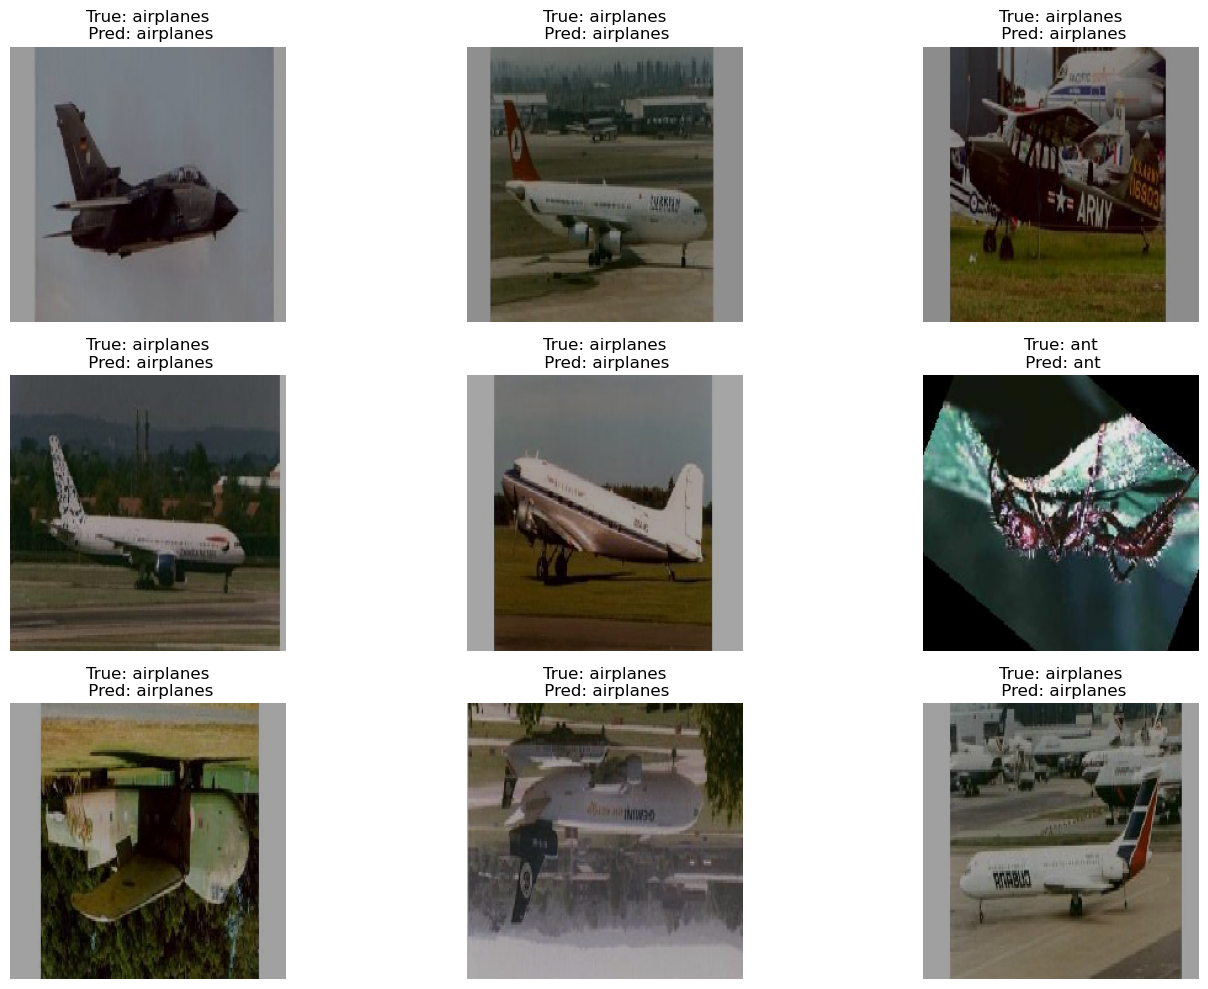


Batch Accuracy: 32/32 = 100.00%


In [16]:
import numpy as np
import matplotlib.pyplot as plt

images, labels = next(val_data)

predictions = model.predict(images)
predicted_classes = np.argmax(predictions,axis=1)
true_classes = np.argmax(labels,axis=1)

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f"True: {selected_classes[true_classes[i]]}\n Pred: {selected_classes[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")